In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.linear_model import Lasso, LogisticRegression, TweedieRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')


os.chdir('/content/drive/MyDrive/2025Spring/DSO 530-Applied Modern Statistical Learning Methods/Final Project')
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Final Deliverable copy.docx',
 'insurance_test.csv',
 'insurance_train.csv',
 'DSO 530 Final Proejct Note.gdoc',
 'DSO 530 Final Project Group Meeing Note.gdoc',
 '530 Project Presentation Final copy.pptx',
 'DSO_530_Group_Project_2025.pdf',
 'Danny_report copy.docx',
 'Danny_report.docx',
 'DSO 530 Final Project_Danny.ipynb']

In [4]:
df = pd.read_csv('insurance_train.csv')

In [5]:
df_test = pd.read_csv('insurance_test.csv')

In [ ]:
## variable meanings


# X1: Internal identification number assigned to each annual contract formalized by an insured.
# X2: Start date of the policyholder’s contract (DD/MM/YYYY).
# X3: Date of last contract renewal (DD/MM/YYYY).
# X4: Date of the next contract renewal (DD/MM/YYYY).
# X5: Date of birth of the insured declared in the policy (DD/MM/YYYY).
# X6: Date of issuance of the insured person’s driver’s license (DD/MM/YYYY).
# X7: Channel through which the policy was contracted (0: Agent, 1: Insurance brokers).
# X8: Total number of years that the insured has been associated with the insurance entity.
# X9: Total number of policies held by the insured in the insurance entity.
# X10: Maximum number of policies that the insured has ever had in force.
# X11: Maximum number of products that the insured has simultaneously held at any given point.
# X12: Number of policies canceled or terminated for nonpayment in the current year.
# X13: Last payment method of the reference policy (1: half-yearly, 0: annual).
# X14: Net premium amount associated with the policy during the current year.

# X15: Total cost of claims for the insurance policy during the current year.
# X16: Total number of claims incurred for the insurance policy during the current year.
# X17: Total number of claims filed throughout the entire duration of the policy.
# X18: Ratio of the number of claims filed to the total duration (years) of the policy in force.

# X19: Type of risk (1: motorbikes, 2: vans, 3: passenger cars, 4: agricultural vehicles).
# X20: 0 for rural, 1 for urban (more than 30,000 inhabitants).
# X21: 1 if multiple regular drivers are declared, 0 if only one driver is declared.
# X22: Year of vehicle registration (YYYY).
# X23: Vehicle power measured in horsepower.
# X24: Cylinder capacity of the vehicle.
# X25: Market value of the vehicle as of 31/12/2019.
# X26: Number of vehicle doors.
# X27: Energy source used to power the vehicle (P: Petrol, D: Diesel).
# X28: Vehicle weight in kilograms.

In [9]:
# Basic dataset info
print(df.info())
print(df.isnull().sum())  #X27 has 593 nulls

df.dropna(inplace=True)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37451 entries, 0 to 37450
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X.1     37451 non-null  int64  
 1   X.2     37451 non-null  object 
 2   X.3     37451 non-null  object 
 3   X.4     37451 non-null  object 
 4   X.5     37451 non-null  object 
 5   X.6     37451 non-null  object 
 6   X.7     37451 non-null  int64  
 7   X.8     37451 non-null  int64  
 8   X.9     37451 non-null  int64  
 9   X.10    37451 non-null  int64  
 10  X.11    37451 non-null  int64  
 11  X.12    37451 non-null  int64  
 12  X.13    37451 non-null  int64  
 13  X.14    37451 non-null  float64
 14  X.15    37451 non-null  float64
 15  X.16    37451 non-null  int64  
 16  X.17    37451 non-null  int64  
 17  X.18    37451 non-null  float64
 18  X.19    37451 non-null  int64  
 19  X.20    37451 non-null  int64  
 20  X.21    37451 non-null  int64  
 21  X.22    37451 non-null  int64  
 22

In [10]:
print(df.describe())

                X.1           X.7           X.8           X.9          X.10  \
count  36858.000000  36858.000000  36858.000000  36858.000000  36858.000000   
mean   26759.944897      0.481632      5.711406      1.482256      1.828016   
std    15412.225895      0.499669      5.813732      0.995757      1.193888   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%    13532.000000      0.000000      2.000000      1.000000      1.000000   
50%    26754.000000      0.000000      4.000000      1.000000      1.000000   
75%    40047.750000      1.000000      7.000000      2.000000      2.000000   
max    53502.000000      1.000000     40.000000     17.000000     17.000000   

               X.11          X.12          X.13          X.14           X.15  \
count  36858.000000  36858.000000  36858.000000  36858.000000   36858.000000   
mean       1.046503      0.382848      0.345244    322.857283     125.528280   
std        0.226946      0.548553      0.475454 

In [12]:
df.head()

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28
0,34429,01/06/2017,01/06/2017,01/06/2018,29/08/1996,31/05/2016,0,1,1,1,...,3,0,0,1994,75,1360,12795.55,4,P,1040
1,5552,19/09/2016,19/09/2018,19/09/2019,30/04/1992,03/08/2010,0,3,1,1,...,3,0,0,2004,100,1896,15386.00,5,D,1165
2,47700,08/01/2003,08/01/2018,08/01/2019,23/03/1972,01/02/1998,1,20,2,2,...,3,0,0,2002,95,1390,16470.00,5,P,1235
3,25425,01/10/2015,01/10/2018,01/10/2019,05/03/1946,07/08/1964,0,8,2,3,...,3,0,0,2010,140,2497,27381.00,5,D,1984
4,4727,26/01/2017,26/01/2018,26/01/2019,25/04/1973,24/07/1998,0,9,1,1,...,3,0,0,1998,80,1969,36600.00,3,P,1702


In [13]:
num_zero_claims = (df['X.16'] == 0).sum()
print(f"Number of rows where X.16 = 0: {num_zero_claims}")

Number of rows where X.16 = 0: 32736


In [14]:
condition = (df['X.15'] > 0) & (df['X.16'] == 0)
num_inconsistent_rows = condition.sum()
print(f"Number of rows where X.15 > 0 but X.16 = 0: {num_inconsistent_rows}")

Number of rows where X.15 > 0 but X.16 = 0: 0


In [15]:
condition = (df['X.15'] == 0) & (df['X.16'] > 0)
num_inconsistent_rows = condition.sum()
print(f"Number of rows where X.15 > 0 but X.16 = 0: {num_inconsistent_rows}")

Number of rows where X.15 > 0 but X.16 = 0: 0


# EDA

In [ ]:
# === Compute Loss Cost (LC), safe divide ===
df['LC'] = np.where(df['X.16'] == 0, 0, df['X.15'] / df['X.16'])

# === Date Conversion and Age Feature Engineering ===
for col in ['X.2', 'X.5', 'X.6']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

# Add age columns for more insight

today = pd.to_datetime('today')
df['age'] = (today - df['X.5']).dt.days // 365
df['license_years'] = (today - df['X.6']).dt.days // 365
df['policy_years'] = (today - df['X.2']).dt.days // 365


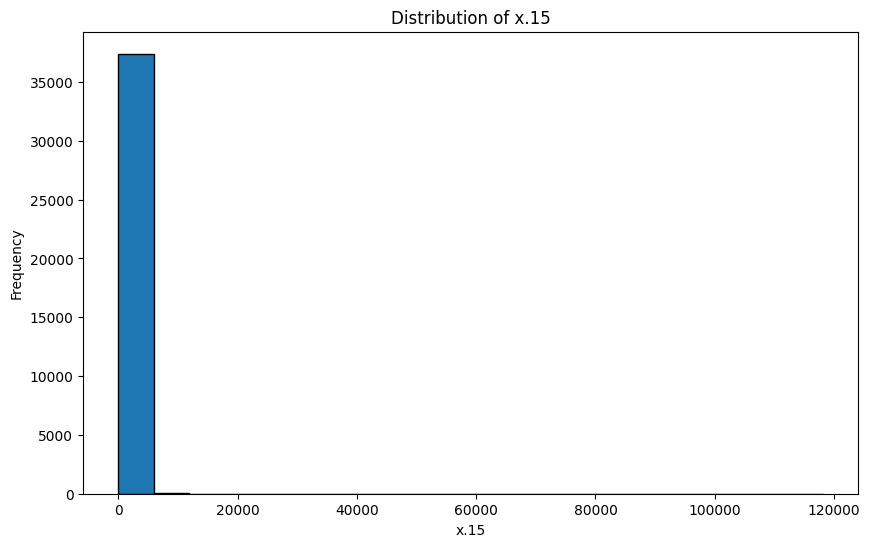

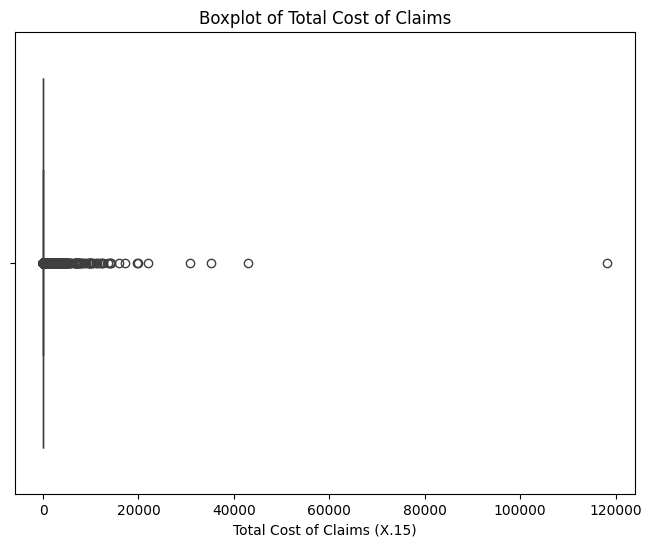

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['LC'], bins=20, edgecolor='black')
plt.xlabel('x.15')
plt.ylabel('Frequency')
plt.title('Distribution of x.15')
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LC'])
plt.xlabel('Total Cost of Claims (X.15)')
plt.title('Boxplot of Total Cost of Claims')
plt.show()

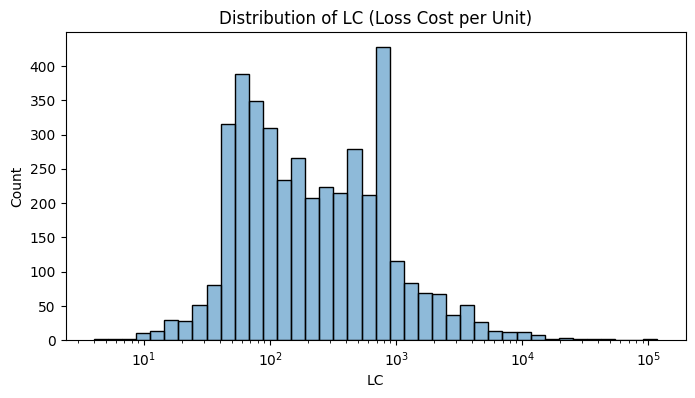

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df["LC"], log_scale=True, kde=True)
plt.title("Distribution of LC (Loss Cost per Unit)")
plt.show()

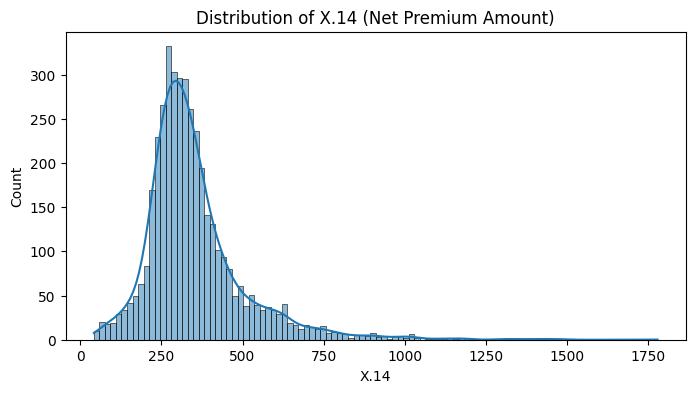

In [ ]:
# prompt: plot distribution for X.14 Net premium amount associated with the policy during the current yea

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.histplot(df_test["X.14"], kde=True)
plt.title("Distribution of X.14 (Net Premium Amount)")
plt.show()


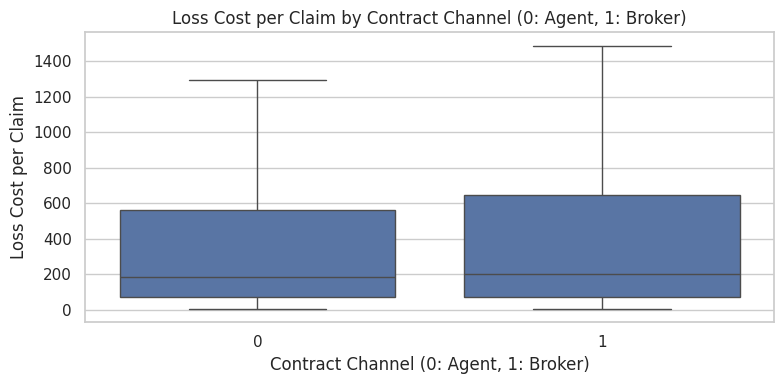

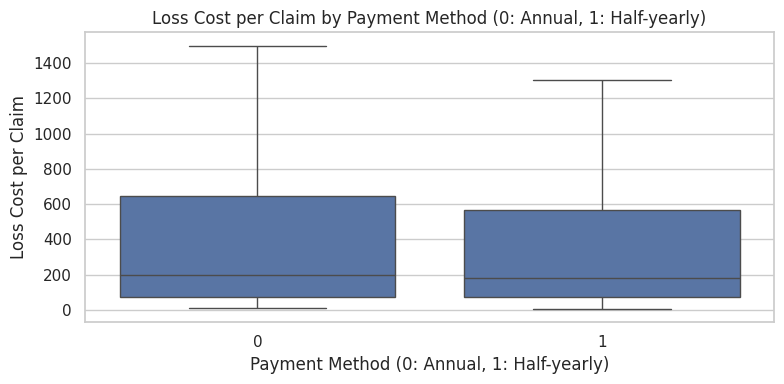

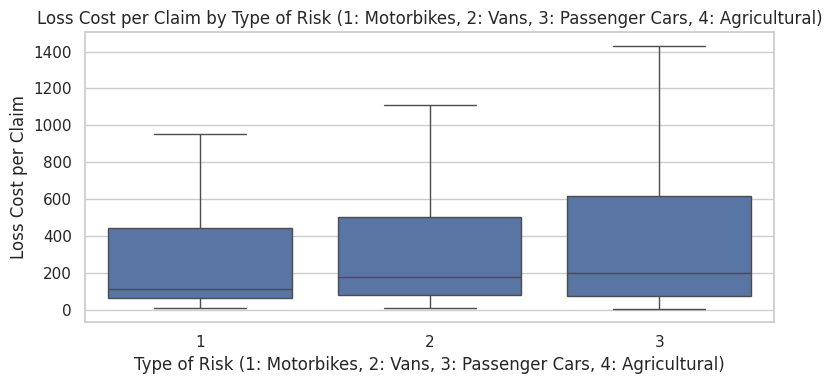

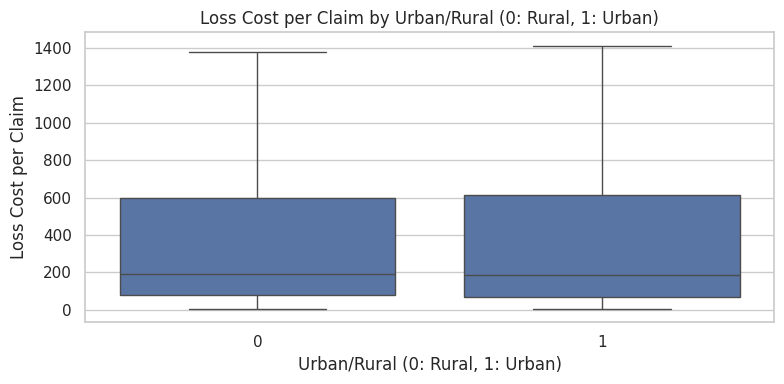

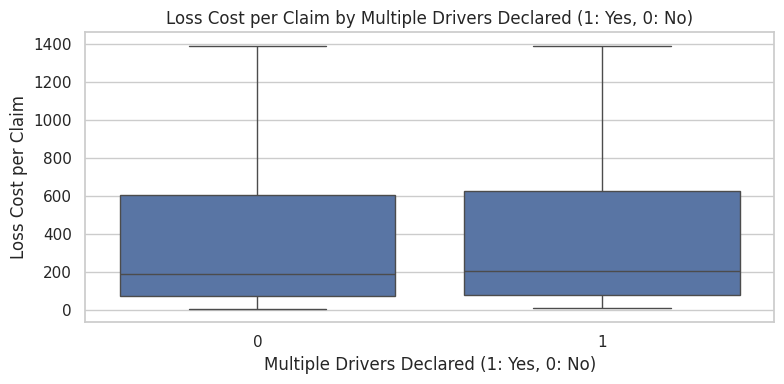

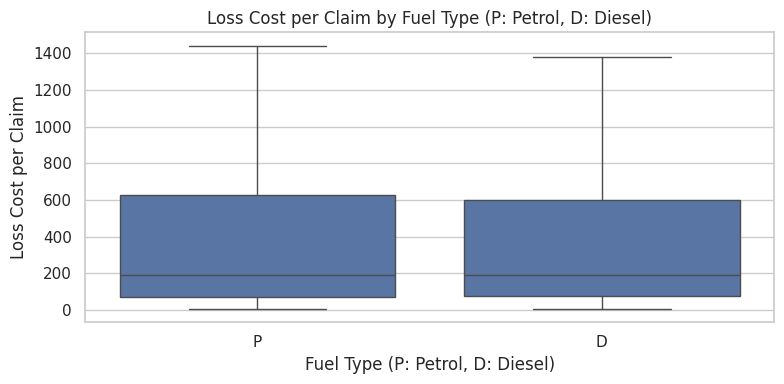

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots look good
sns.set(style="whitegrid")

# Variable descriptions
var_descriptions = {
    "X.7": "Contract Channel (0: Agent, 1: Broker)",
    "X.13": "Payment Method (0: Annual, 1: Half-yearly)",
    "X.19": "Type of Risk (1: Motorbikes, 2: Vans, 3: Passenger Cars, 4: Agricultural)",
    "X.20": "Urban/Rural (0: Rural, 1: Urban)",
    "X.21": "Multiple Drivers Declared (1: Yes, 0: No)",
    "X.27": "Fuel Type (P: Petrol, D: Diesel)"
}

# List of categorical variables
categorical_cols = list(var_descriptions.keys())

# Create one plot per variable
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y="LC", data=df, showfliers=False)
    plt.title(f"Loss Cost per Claim by {var_descriptions[col]}")
    plt.xlabel(var_descriptions[col])
    plt.ylabel("Loss Cost per Claim")
    plt.tight_layout()
    plt.show()

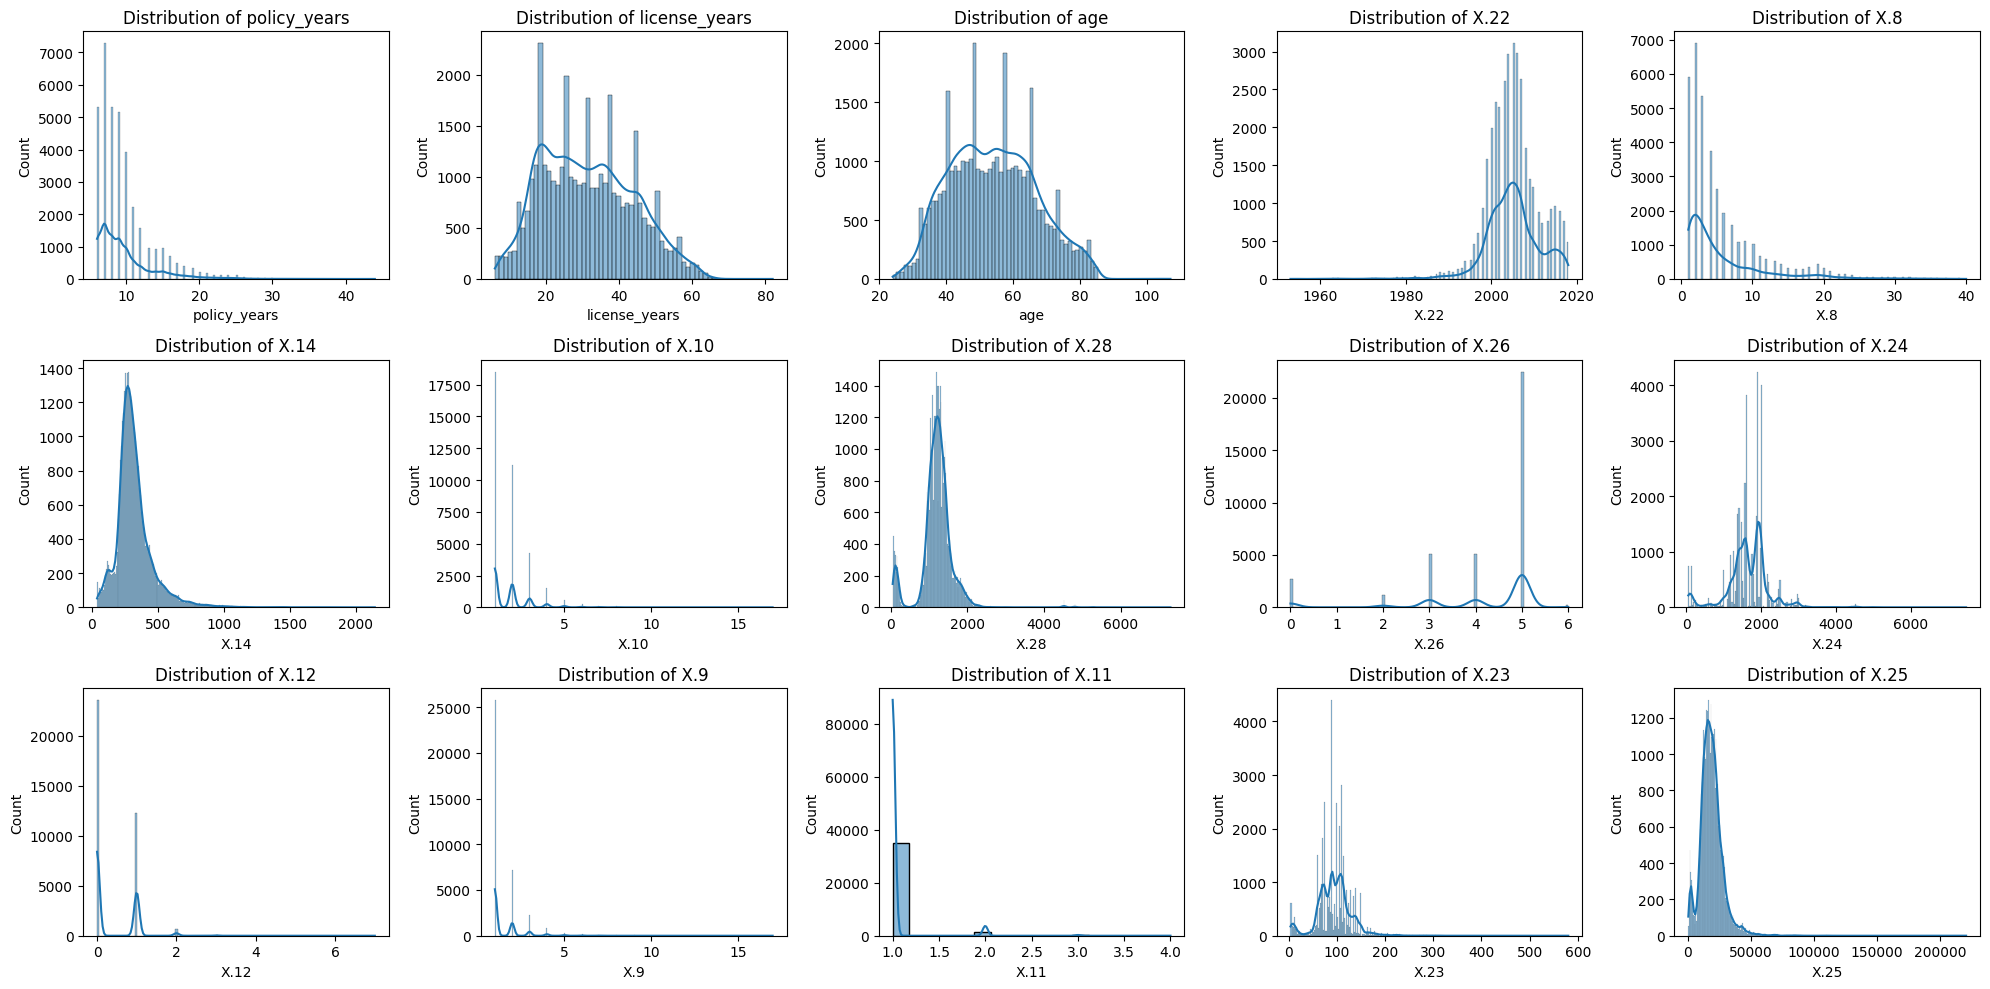

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature set
features = [
    'X.7', 'X.8', 'X.9', 'X.10', 'X.11', 'X.12', 'X.13',
    'X.14', 'X.19', 'X.20', 'X.21', 'X.22', 'X.23', 'X.24',
    'X.25', 'X.26', 'X.27', 'X.28', 'age', 'license_years', 'policy_years'
]

# Categorical and numeric columns
categorical_cols = ['X.7', 'X.13', 'X.19', 'X.20', 'X.21', 'X.27']
numeric_cols = [col for col in features if col not in categorical_cols]

# Calculate the number of rows and columns for the subplots
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Iterate through the numeric features and plot the distribution
for i, col in enumerate(numeric_cols):
    if i < len(numeric_cols):
      sns.histplot(df[col], kde=True, ax=axes[i])
      axes[i].set_title(f'Distribution of {col}')
    else:
      axes[i].set_visible(False)

plt.tight_layout()
plt.show()


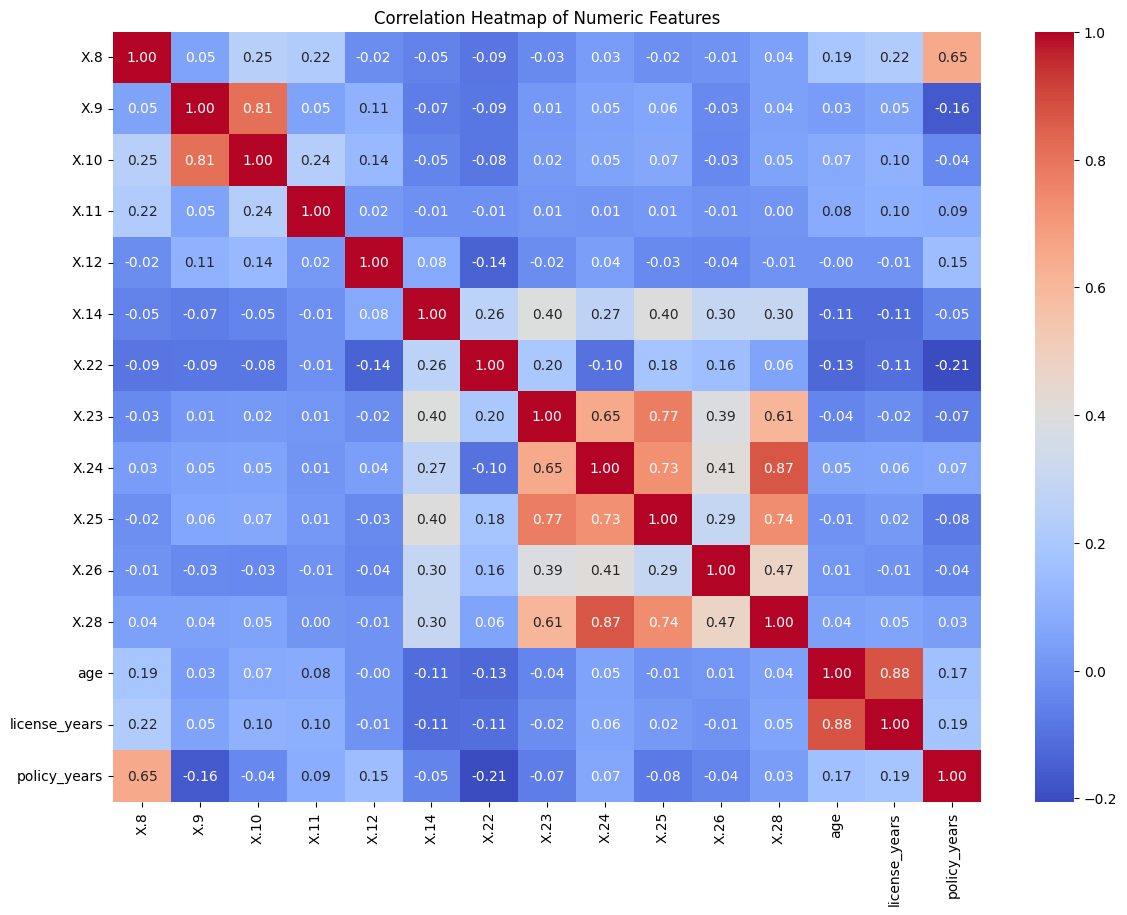

In [17]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Preprocessing

In [ ]:
df['Claim_Status'] = (df['X.16'] > 0).astype(int)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Compute LC
df['LC'] = df.apply(lambda row: row['X.15'] / row['X.16'] if row['X.16'] > 0 else 0, axis=1)


# Dates → derived features
today = pd.to_datetime('2025-04-23')
for col in ['X.2', 'X.5', 'X.6']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')
df['age'] = (today - df['X.5']).dt.days // 365
df['license_years'] = (today - df['X.6']).dt.days // 365
df['policy_years'] = (today - df['X.2']).dt.days // 365

# Feature set
features = [
    'X.7', 'X.8', 'X.9', 'X.10', 'X.11', 'X.12', 'X.13',
    'X.14', 'X.19', 'X.20', 'X.21', 'X.22', 'X.23', 'X.24',
    'X.25', 'X.26', 'X.27', 'X.28', 'age', 'license_years', 'policy_years'
]

# Drop rows with missing values
df.dropna(subset=features, inplace=True)

# Define X and y
X = df[features]
y = df['LC']

# Categorical and numeric columns
categorical_cols = ['X.7', 'X.13', 'X.19', 'X.20', 'X.21', 'X.27']
numeric_cols = [col for col in features if col not in categorical_cols]

# Standardization Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Power Preprocessing
preprocessor_power = ColumnTransformer([
    ('num', PowerTransformer(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_transformed = preprocessor.fit_transform(X)

# Lasso to select the optimal features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline


# Step 1: Lasso Feature Selection using GridSearchCV
lasso = Lasso()

# Define parameter grid for Lasso
lasso_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # Regularization strength
}

# Set up GridSearchCV for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_transformed, y)

# Best Lasso model and selected features based on best alpha
best_lasso = lasso_grid_search.best_estimator_
best_alpha = lasso_grid_search.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha}")


# Get the Lasso coefficients and identify important features
lasso_coefficients = best_lasso.coef_

# Get feature names after preprocessing
# Numeric features after scaling (scaler doesn't retain names, so we use original)
numeric_features_transformed = numeric_cols
# Categorical features after one-hot encoding
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine numeric and categorical feature names
feature_names = np.concatenate([numeric_features_transformed, cat_feature_names])

# Identifying the selected features and eliminated features
selected_feature_indices = np.where(lasso_coefficients != 0)[0]
eliminated_feature_indices = np.where(lasso_coefficients == 0)[0]

# Mapping selected and eliminated feature names back to original features
selected_features = feature_names[selected_feature_indices]
eliminated_features = feature_names[eliminated_feature_indices]

# Number of selected and eliminated features
num_selected_features = len(selected_features)
num_eliminated_features = len(eliminated_features)

# Print results
print(f"Best alpha: {best_alpha}")
print(f"Number of selected features: {num_selected_features}")
print(f"Selected features: {selected_features}")
print(f"Number of eliminated features: {num_eliminated_features}")
print(f"Eliminated features: {eliminated_features}")

Best alpha for Lasso: 1.0
Best alpha: 1.0
Number of selected features: 16
Selected features: ['X.8' 'X.9' 'X.10' 'X.11' 'X.12' 'X.14' 'X.22' 'X.23' 'X.28' 'age'
 'license_years' 'policy_years' 'X.7_0' 'X.13_0' 'X.13_1' 'X.21_0']
Number of eliminated features: 13
Eliminated features: ['X.24' 'X.25' 'X.26' 'X.7_1' 'X.19_1' 'X.19_2' 'X.19_3' 'X.19_4' 'X.20_0'
 'X.20_1' 'X.21_1' 'X.27_D' 'X.27_P']


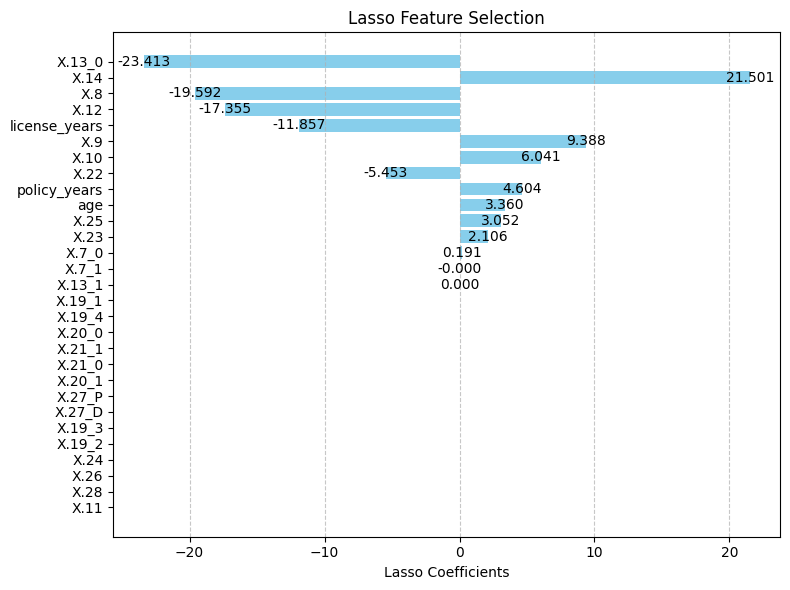

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get the Lasso coefficients
lasso_coefficients = best_lasso.coef_

# Get feature names after preprocessing (numeric and categorical combined)
numeric_features_transformed = numeric_cols
categorical_features_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numeric_features_transformed, categorical_features_transformed])

# Combine the feature names and coefficients into a DataFrame for easy sorting
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Sort by the absolute value of the coefficients in ascending order
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=True)

# Plot the sorted coefficients
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Lasso Coefficients')
plt.title('Lasso Feature Selection')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Highlight non-zero coefficients with annotations
for i, coef in enumerate(feature_importance['Coefficient']):
    if coef != 0:
        plt.text(coef, i, f'{coef:.3f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

# Regression - task 1 predicting insurance loss cost

# Extreme GBM w/ Cross Validation

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-3.26756437e+35 -7.15808121e+05             nan -3.26756437e+35
 -7.15497113e+05             nan -3.26756437e+35 -7.16128692e+05
             nan -3.26756437e+35 -7.15392638e+05             nan]
  warnings.warn(


Best Parameters: {'regressor__reg_alpha': 1.0, 'regressor__tweedie_variance_power': 1.5}
MSE (CV Tuned Model): 217392.02249079116


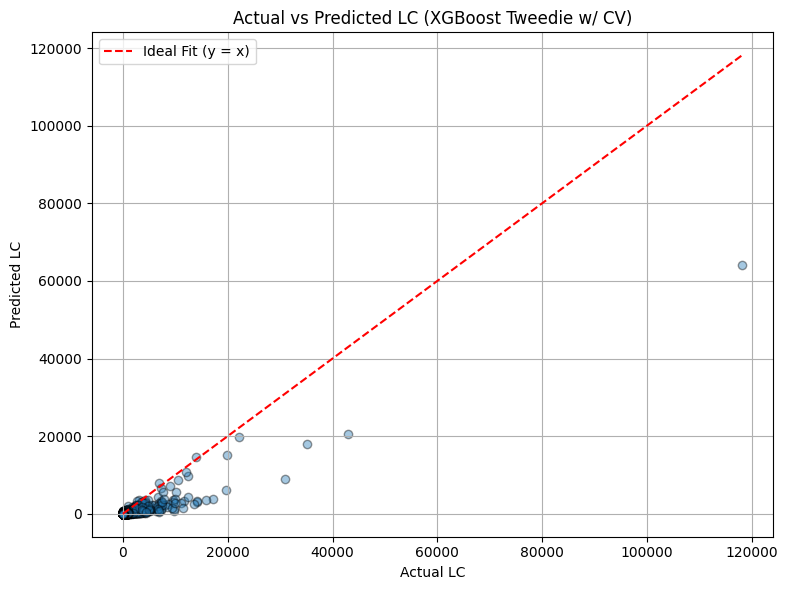

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:tweedie',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Parameter grid
param_grid = {
    'regressor__reg_alpha': [0.01, 0.1, 0.5, 1.0],
    'regressor__tweedie_variance_power': [1.0, 1.5, 1.9]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X, y)

# Best model and results
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)

# Output
print("Best Parameters:", grid_search.best_params_)
print("MSE (CV Tuned Model):", mse)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.4, edgecolor='k')
plt.plot([0, max(y.max(), y_pred.max())], [0, max(y.max(), y_pred.max())],
         'r--', label='Ideal Fit (y = x)')
plt.xlabel("Actual LC")
plt.ylabel("Predicted LC")
plt.title("Actual vs Predicted LC (XGBoost Tweedie w/ CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP for Loss Cost

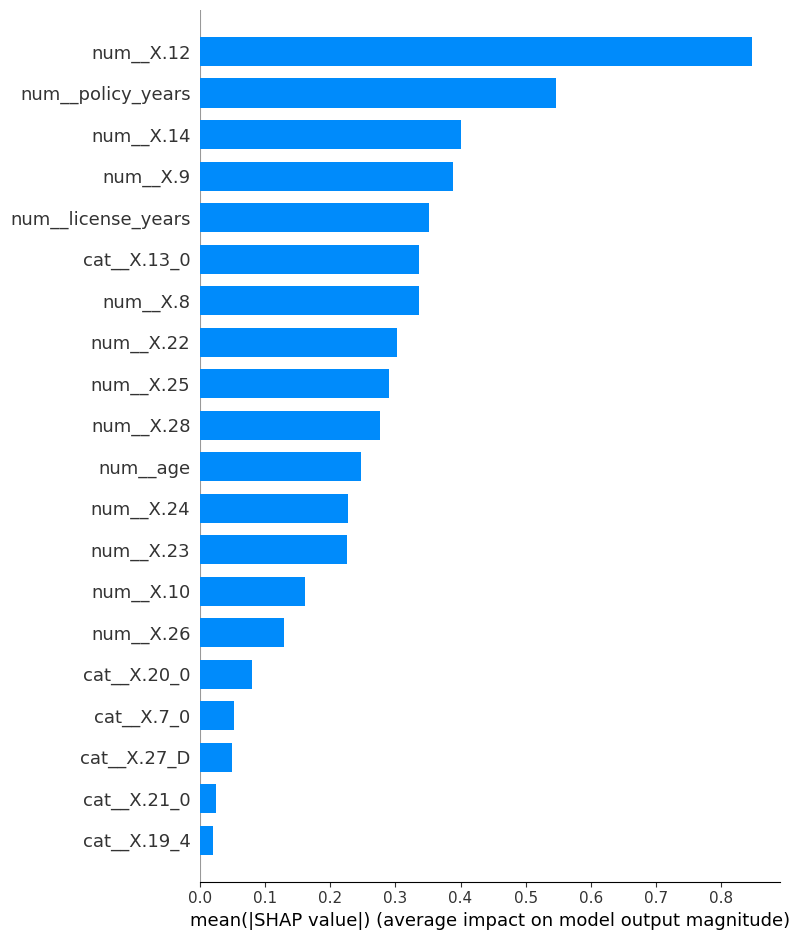

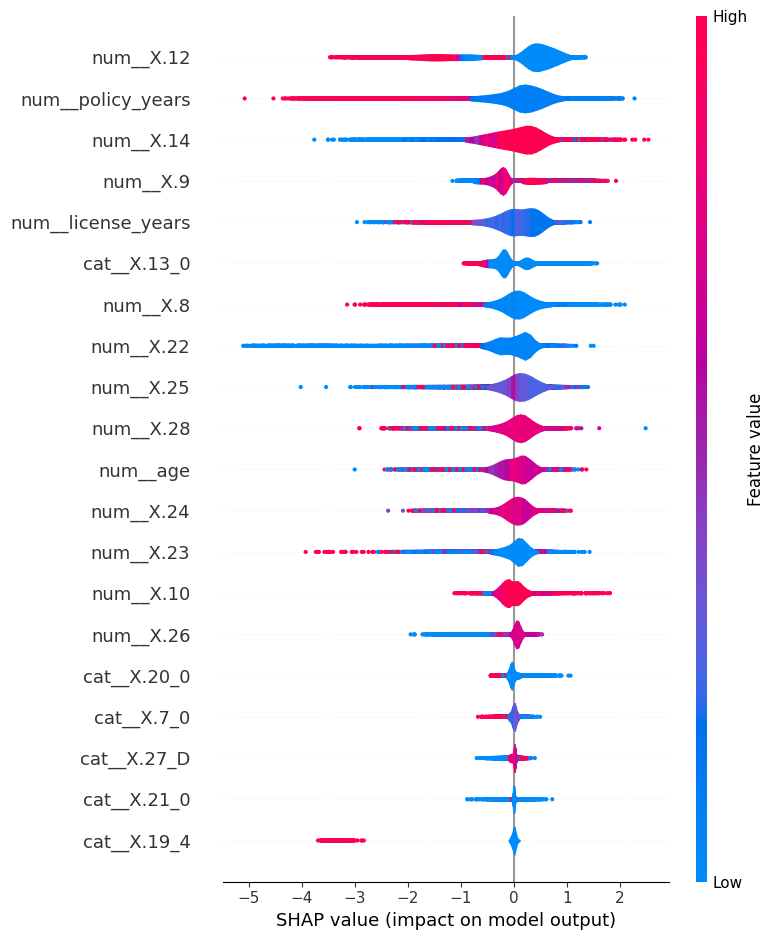

In [ ]:
# SHAP Explainer
import shap
import pandas as pd
# Fit the preprocessor separately before transforming X
# SHAP Explainer
# Apply preprocessing to the data
preprocessor.fit(X)
X_transformed = preprocessor.transform(X)

# Get the feature names after preprocessing
encoded_feature_names = preprocessor.get_feature_names_out()

# SHAP Explainer for the XGBClassifier
explainer = shap.Explainer(best_model, X_transformed)
shap_values = explainer(X_transformed)

# SHAP Bar Plot (with encoded feature names and title)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_transformed, plot_type="bar", feature_names=encoded_feature_names)


# SHAP Violin Plot (with encoded feature names and title)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_transformed, plot_type="violin", feature_names=encoded_feature_names)

plt.show()

# LightGBM for Historically Adjusted Loss Cost

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.243474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 36858, number of used features: 29
[LightGBM] [Info] Start training from score 4.866702


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Best Parameters: {'regressor__reg_alpha': 0.5, 'regressor__tweedie_variance_power': 1.1}
MSE (CV Tuned Model): 360881.60433959396


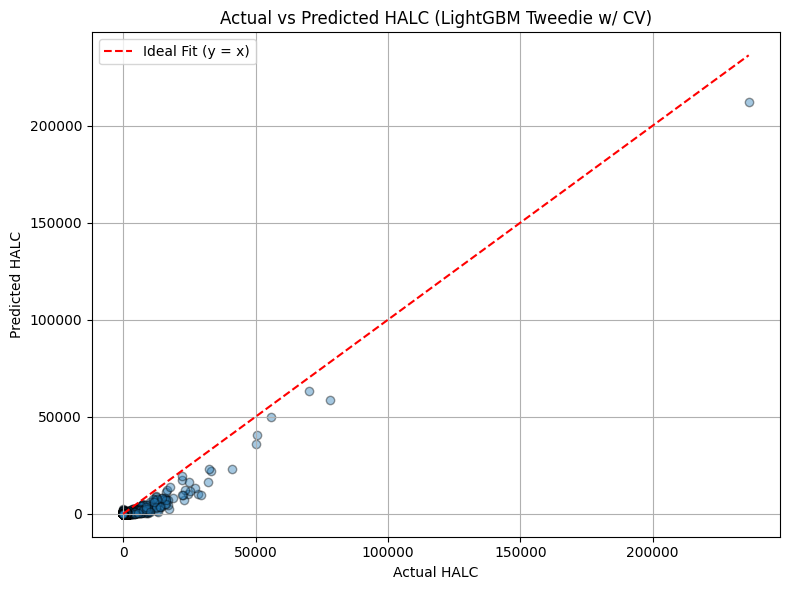

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# Feature set
features = [
    'X.7', 'X.8', 'X.9', 'X.10', 'X.11', 'X.12', 'X.13',
    'X.14', 'X.19', 'X.20', 'X.21', 'X.22', 'X.23', 'X.24',
    'X.25', 'X.26', 'X.27', 'X.28', 'age', 'license_years', 'policy_years'
]

# Drop rows with missing values
df.dropna(subset=features + ['HALC'], inplace=True)

# Define X and y
X = df[features]
y = df['HALC']

# Categorical and numeric columns
categorical_cols = ['X.7', 'X.13', 'X.19', 'X.20', 'X.21', 'X.27']
numeric_cols = [col for col in features if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# LightGBM Regressor
lgbm_model = LGBMRegressor(
    objective='tweedie',
    random_state=42,
    n_jobs=-1
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', lgbm_model)
])

# Parameter grid
param_grid = {
    'regressor__reg_alpha': [0.01, 0.1, 0.5],
    'regressor__tweedie_variance_power': [1.1, 1.5, 1.9]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X, y)

# Best model and results
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)

# Output
print("Best Parameters:", grid_search.best_params_)
print("MSE (CV Tuned Model):", mse)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.4, edgecolor='k')
plt.plot([0, max(y.max(), y_pred.max())], [0, max(y.max(), y_pred.max())],
         'r--', label='Ideal Fit (y = x)')
plt.xlabel("Actual HALC")
plt.ylabel("Predicted HALC")
plt.title("Actual vs Predicted HALC (LightGBM Tweedie w/ CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP for Historically Adjusted Loss Cost

100%|===================| 36789/36858 [02:45<00:00]       

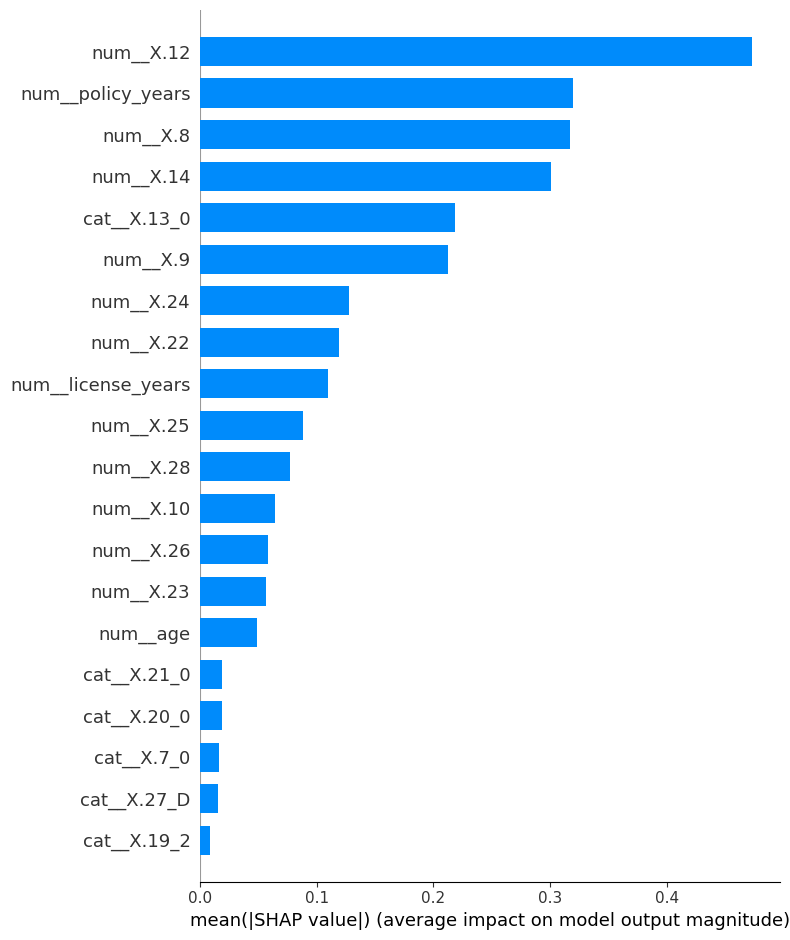

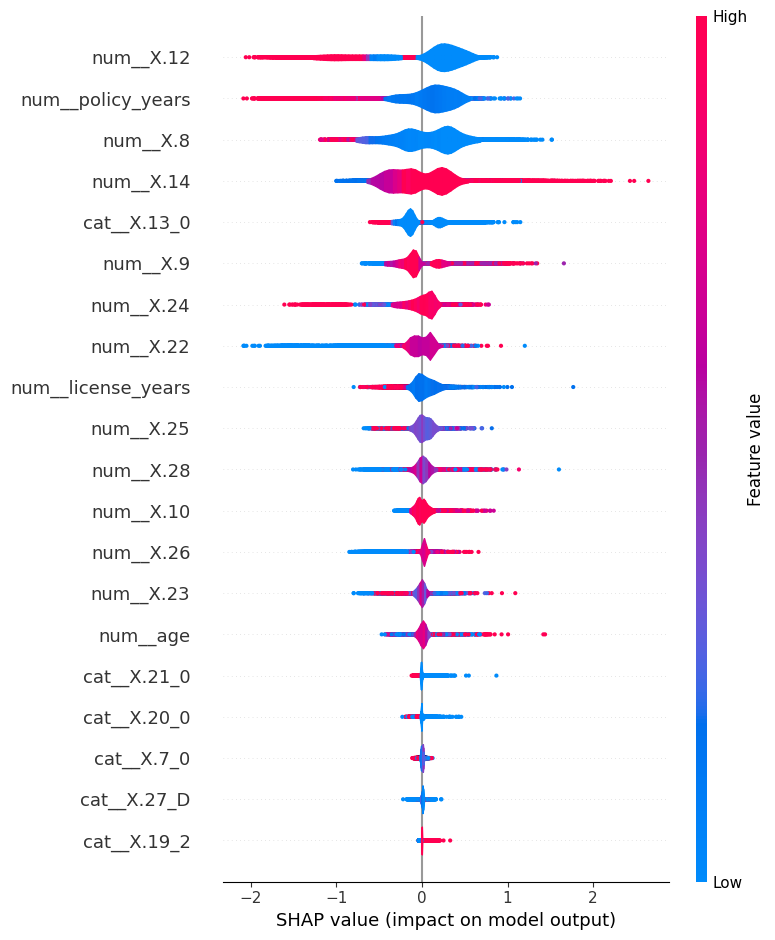

In [ ]:
# SHAP Explainer
import shap
import pandas as pd
# Fit the preprocessor separately before transforming X
# SHAP Explainer
# Apply preprocessing to the data
preprocessor.fit(X)
X_transformed = preprocessor.transform(X)

# Get the feature names after preprocessing
encoded_feature_names = preprocessor.get_feature_names_out()

# SHAP Explainer
explainer = shap.Explainer(best_model.named_steps['regressor'], X_transformed)
shap_values = explainer(X_transformed)

# SHAP Bar Plot (with feature names and title)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_transformed, plot_type="bar", feature_names=encoded_feature_names)

# SHAP Violin Plot (with feature names and title)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_transformed, plot_type="violin", feature_names=encoded_feature_names)

plt.show()

# Classification - task 2 predicting claim status

# XGBMClassifier w CV

- Preprocessing

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load data
df = pd.read_csv("insurance_train.csv")


# Step 1: Define the target variable
df['Claim_Status'] = (df['X.16'] > 0).astype(int)  # 1 if claim occurred, 0 if no claim

# Step 2: Compute LC
df['LC'] = df.apply(lambda row: row['X.15'] / row['X.16'] if row['X.16'] > 0 else 0, axis=1)

# Step 3: Dates → derived features
today = pd.to_datetime('2025-04-23')
for col in ['X.2', 'X.5', 'X.6']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

df['age'] = (today - df['X.5']).dt.days // 365
df['license_years'] = (today - df['X.6']).dt.days // 365
df['policy_years'] = (today - df['X.2']).dt.days // 365

# Step 4: Feature set
features = [
    'X.7', 'X.8', 'X.9', 'X.10', 'X.11', 'X.12', 'X.13',
    'X.14', 'X.19', 'X.20', 'X.21', 'X.22', 'X.23', 'X.24',
    'X.25', 'X.26', 'X.27', 'X.28', 'age', 'license_years', 'policy_years'
]

df.dropna(subset=features, inplace=True)

X = df[features]  # Features
y = df['Claim_Status']  # Target variable

# Step 5: Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['age', 'license_years', 'policy_years', 'X.7', 'X.8', 'X.9', 'X.10', 'X.11', 'X.12', 'X.14', 'X.19', 'X.20', 'X.21', 'X.22', 'X.23', 'X.24', 'X.25', 'X.26', 'X.28']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['X.13', 'X.19', 'X.20', 'X.21', 'X.27'])
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Cross-Validation Accuracy (XGBoost): 0.8870
Best Parameters (XGBoost): {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      6599
           1       0.51      0.03      0.07       773

    accuracy                           0.90      7372
   macro avg       0.70      0.52      0.50      7372
weighted avg       0.86      0.90      0.85      7372



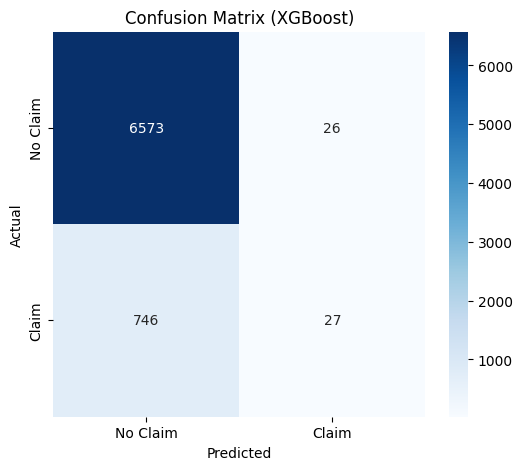

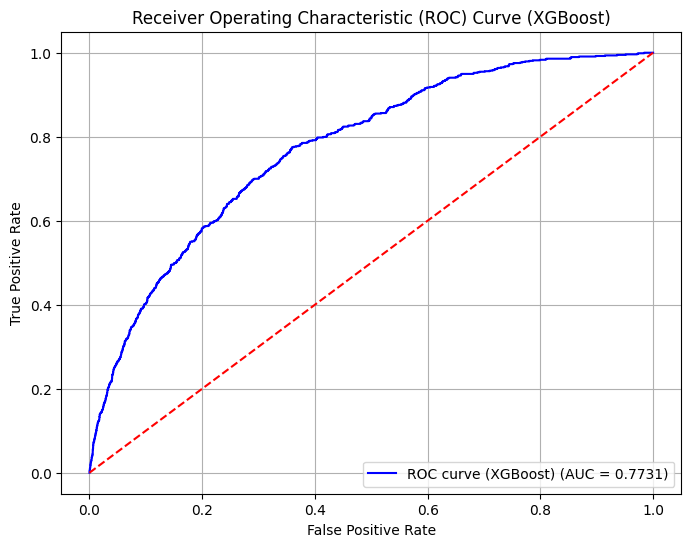

In [ ]:
# Step 7: Define XGBClassifier model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Step 8: Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.1, 0.2],
}

# Step 9: GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy to select best parameters
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_transformed, y_train)

# Best parameters and best model from GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# Best cross-validation score (accuracy)
best_cv_score_xgb = grid_search_xgb.best_score_
print(f"Best Cross-Validation Accuracy (XGBoost): {best_cv_score_xgb:.4f}")
print(f"Best Parameters (XGBoost): {grid_search_xgb.best_params_}")

# Step 10: Evaluate on the test set
y_pred_xgb = best_xgb_model.predict(X_test_transformed)

# Accuracy Score
accuracy_xgb = classification_report(y_test, y_pred_xgb)
print(f"\nClassification Report (XGBoost):")
print(accuracy_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title(f"Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC-AUC Curve
# Predict probabilities for ROC curve
y_prob_xgb = best_xgb_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class (claim)

# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='b', label=f'ROC curve (XGBoost) (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Random classifier line
plt.title(f'Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

100%|===================| 29386/29486 [05:29<00:01]       

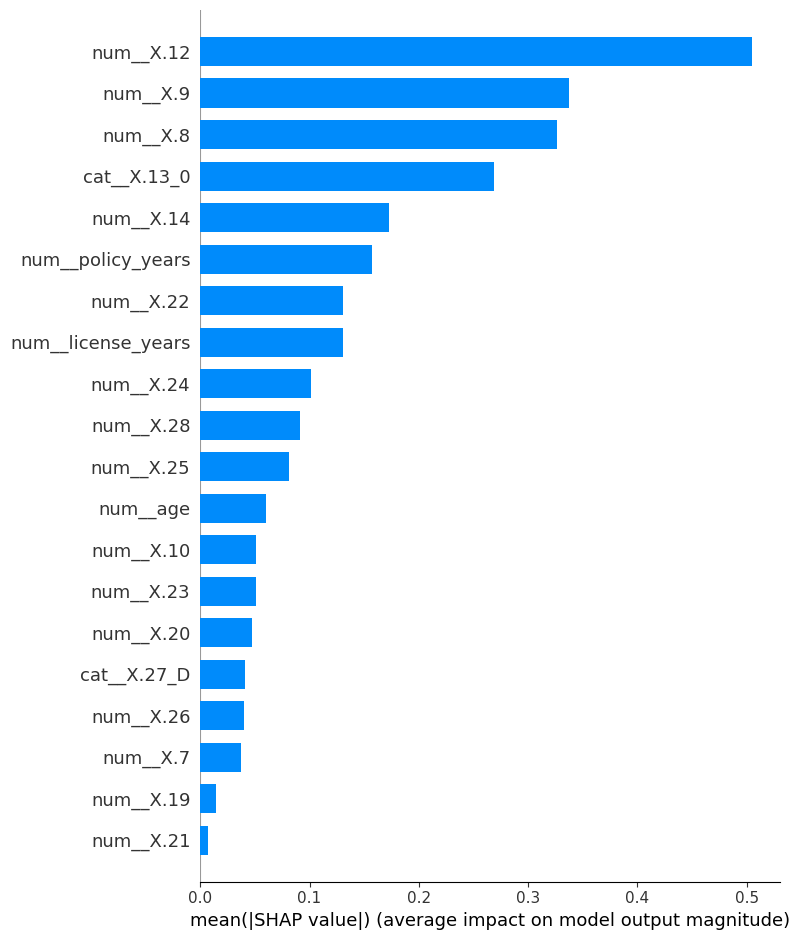

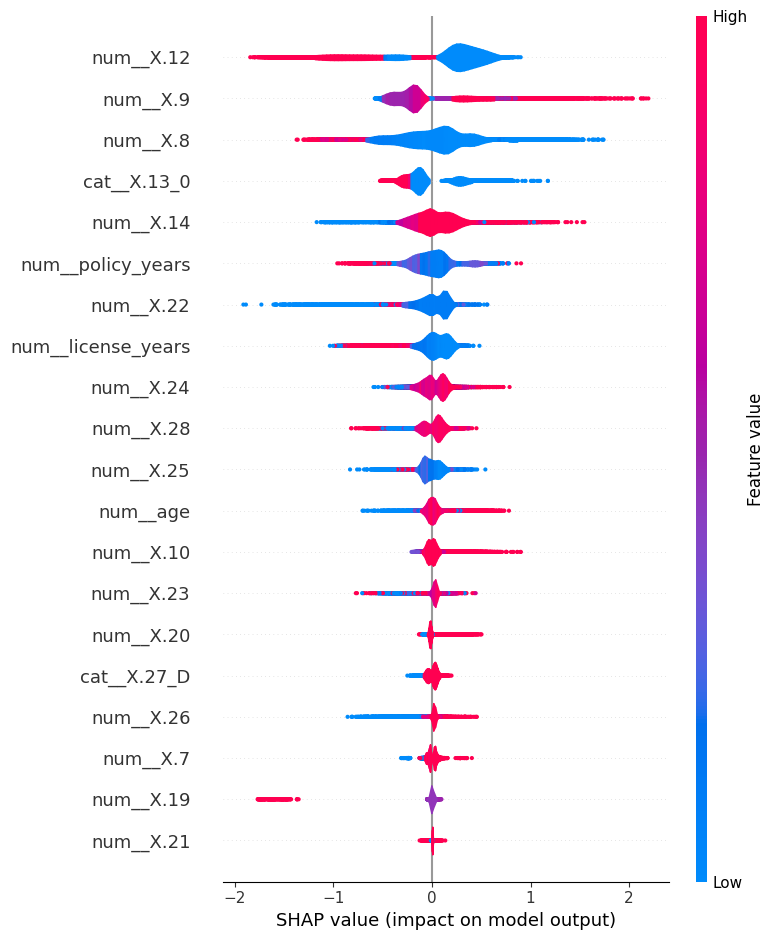

In [ ]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing
encoded_feature_names = preprocessor.get_feature_names_out()

# SHAP Explainer for the XGBClassifier
explainer = shap.Explainer(best_xgb_model, X_train_transformed)
shap_values = explainer(X_train_transformed)

# SHAP Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_transformed, plot_type="bar", feature_names=encoded_feature_names)

# SHAP Violin Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_transformed, plot_type="violin", feature_names=encoded_feature_names)

plt.show()

# LightGBMClassifier w CV

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3349, number of negative: 26137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 29486, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113579 -> initscore=-2.054690
[LightGBM] [Info] Start training from score -2.054690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Cross-Validation Accuracy (LightGBM): 0.8876
Best Parameters (LightGBM): {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 31}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      6599
           1       0.45      0.03      0.06       773

    accuracy                           0.89      7372
   macro avg       0.67      0.51      0.50      7372
weighted avg       0.85      0.89      0.85      7372



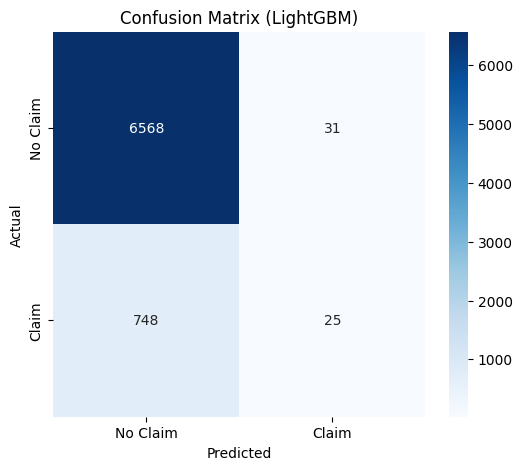

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


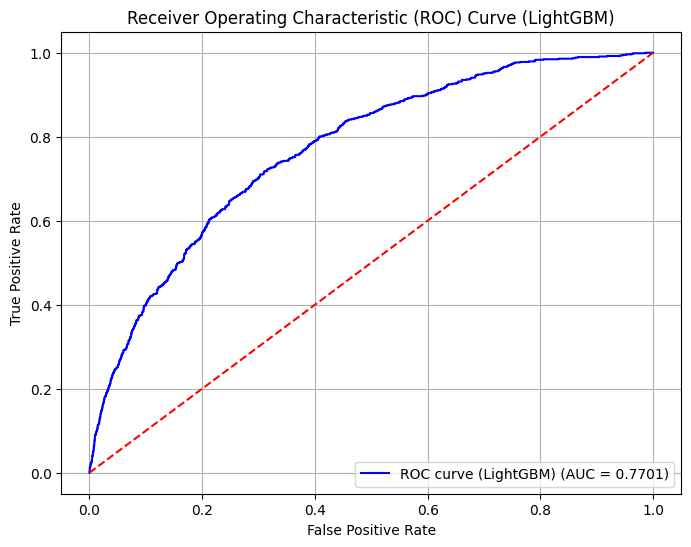

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 7: Define LightGBM Classifier model
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)

# Step 8: Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
}

# Step 9: GridSearchCV with cross-validation
grid_search_lgb = GridSearchCV(
    lgb_model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy to select best parameters
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_lgb.fit(X_train_transformed, y_train)

# Best parameters and best model from GridSearchCV
best_lgb_model = grid_search_lgb.best_estimator_

# Best cross-validation score (accuracy)
best_cv_score_lgb = grid_search_lgb.best_score_
print(f"Best Cross-Validation Accuracy (LightGBM): {best_cv_score_lgb:.4f}")
print(f"Best Parameters (LightGBM): {grid_search_lgb.best_params_}")

# Step 10: Evaluate on the test set
y_pred_lgb = best_lgb_model.predict(X_test_transformed)

# Accuracy Score
accuracy_lgbm = classification_report(y_test, y_pred_lgb)
print(f"\nClassification Report (LightGBM):")
print(accuracy_lgbm)

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title(f"Confusion Matrix (LightGBM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC-AUC Curve
# Predict probabilities for ROC curve
y_prob_lgb = best_lgb_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class (claim)

# Compute ROC curve
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_prob_lgb)
roc_auc_lgbm = roc_auc_score(y_test, y_prob_lgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='b', label=f'ROC curve (LightGBM) (AUC = {roc_auc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Random classifier line
plt.title(f'Receiver Operating Characteristic (ROC) Curve (LightGBM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Randomforest w CV

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Cross-Validation Accuracy (Random Forest): 0.8870
Best Parameters (Random Forest): {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6599
           1       0.86      0.01      0.02       773

    accuracy                           0.90      7372
   macro avg       0.88      0.50      0.48      7372
weighted avg       0.89      0.90      0.85      7372



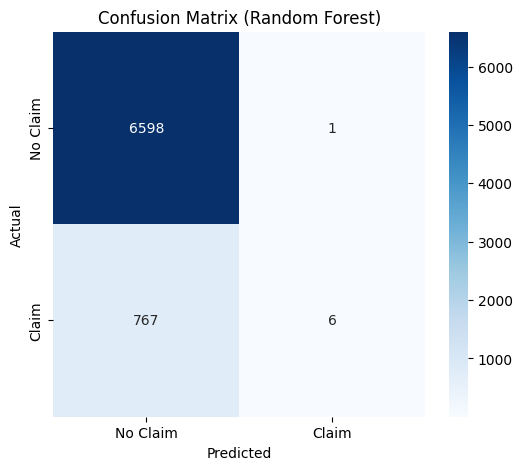

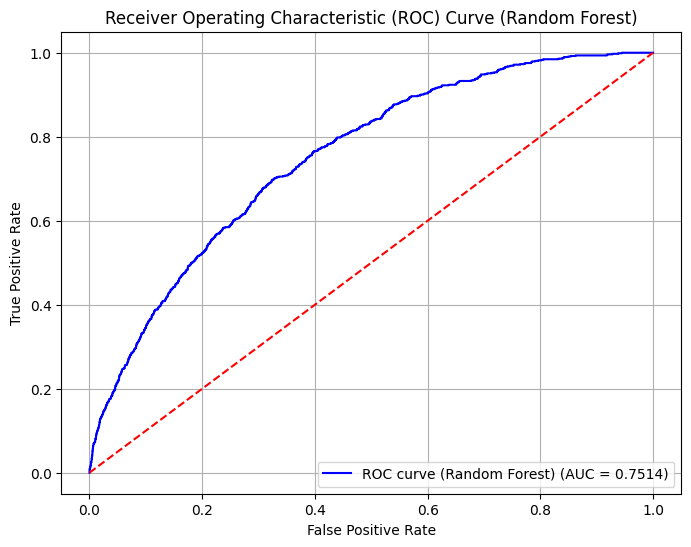

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 7: Define RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Step 8: Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Step 9: GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(
    rf_model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy to select best parameters
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train_transformed, y_train)

# Best parameters and best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Best cross-validation score (accuracy)
best_cv_score_rf = grid_search_rf.best_score_
print(f"Best Cross-Validation Accuracy (Random Forest): {best_cv_score_rf:.4f}")
print(f"Best Parameters (Random Forest): {grid_search_rf.best_params_}")

# Step 10: Evaluate on the test set
y_pred_rf = best_rf_model.predict(X_test_transformed)

# Accuracy Score
accuracy_rf = classification_report(y_test, y_pred_rf)
print(f"\nClassification Report (Random Forest):")
print(accuracy_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title(f"Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC-AUC Curve
# Predict probabilities for ROC curve
y_prob_rf = best_rf_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class (claim)

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='b', label=f'ROC curve (Random Forest) (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Random classifier line
plt.title(f'Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# accuracy_xgbm, accuracy_lgbm, accuracy_rf (Accuracy values for XGBoost, LightGBM, and Random Forest)
# roc_auc_xgbm, roc_auc_lgbm, roc_auc_rf (ROC AUC values for XGBoost, LightGBM, and Random Forest)

# Accuracy values for the models (You should have these already)
best_cv_score = [best_cv_score_xgb, best_cv_score_lgbm, best_cv_score_rf]
models = ['XGBoost', 'LightGBM', 'Random Forest']

# Step 1: Plot Accuracy Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(models, best_cv_score, color=['b', 'g', 'r'], alpha=0.6)
plt.title('Model Comparison: CV_Score')
plt.xlabel('Models')
plt.ylabel('best_cv_score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ROC-AUC values for the models (You should have these already)
roc_auc_values = [roc_auc_xgb, roc_auc_lgbm, roc_auc_rf]

# Step 2: Plot ROC-AUC Curve Comparison for all models
plt.figure(figsize=(8, 6))

# Plotting the ROC curve for each model
for model, roc_auc in zip(models, roc_auc_values):
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Random classifier line
    plt.text(0.5, 0.2, f'{model} (AUC = {roc_auc:.4f})', fontsize=12, color='black', ha='center')

# Ideal ROC curve
plt.title('Model Comparison: ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()